In [1]:
import tensorflow as tf
sess = tf.Session()




In [5]:
# coding=utf-8
# create a zero filled tensor
zero_tsr = tf.zeros([2, 4])
# create a one filled tensor
ones_tsr = tf.ones([2, 4])
# create a constant filled tensor
filled_tsr = tf.fill([1, 2], 42)
# create a tensor out of a existing constant
constant_tsr = tf.constant([1, 2, 3])

# Ctrl + Q to see a quick definition
zeros_similar = tf.zeros_like(constant_tsr)
ones_similar = tf.ones_like(constant_tsr)



 

In [3]:
zeros_similar

<tf.Tensor 'zeros_like:0' shape=(3,) dtype=int32>

In [7]:
linear_tsr = tf.linspace(.0, 1.0, 3)

In [22]:
# init = tf.global_variables_initializer()

print(sess.run(linear_tsr))
    

[0.  0.5 1. ]


In [6]:
print(sess.run(zeros_similar))

[0 0 0]


In [9]:
randunif_tsr = tf.random_uniform([2, 3])
sess.run(randunif_tsr)

array([[0.09643805, 0.410156  , 0.73734057],
       [0.48581696, 0.18597639, 0.11657941]], dtype=float32)

In [10]:
randnorm_tsr = tf.random_normal([2, 3], 0, 1)
sess.run(randnorm_tsr)

array([[-0.65845215, -0.42706797,  2.5979245 ],
       [ 0.13467829, -0.524702  , -1.3805217 ]], dtype=float32)

In [12]:
#picks values within two standard deviations of the mean
runcnorm_tsr = tf.truncated_normal([2, 3], 0, 1)
sess.run(runcnorm_tsr)

array([[-0.38593704,  0.7680914 , -0.0243112 ],
       [-0.7367163 , -0.38752282,  0.5152143 ]], dtype=float32)

In [8]:
# to download data from url
# import requests
# see examples in p21 in TensorFlow cookbook




In [10]:
import tensorflow as tf
sess = tf.Session()
import numpy as np
x_vals = np.array([1., 3., 5., 7.,9.])
x_data = tf.placeholder(tf.float32)
m_const = tf.constant(3.)
my_product = tf.multiply(x_data, m_const)
for x_val in x_vals:
    print(sess.run(my_product, feed_dict={x_data: x_val }))
    

3.0
9.0
15.0
21.0
27.0


In [11]:
my_array = np.array([[1., 3., 5., 7., 9.],
[-2., 0., 2., 4., 6.],
[-6., -3., 0., 3., 6.]])
x_vals = np.array([my_array, my_array + 1])
x_data = tf.placeholder(tf.float32, shape=(3, 5))

m1 = tf.constant([[1.],[0.],[-1.],[2.],[4.]])
m2 = tf.constant([[2.]])
a1 = tf.constant([[10.]])

prod1 = tf.matmul(x_data, m1)
prod2 = tf.matmul(prod1, m2)
add1 = tf.add(prod2, a1)

for x_val in x_vals:
    print(sess.run(add1, feed_dict={x_data: x_val}))


[[102.]
 [ 66.]
 [ 58.]]
[[114.]
 [ 78.]
 [ 70.]]


we designate dimension that can vary or is unknow as value None

In [15]:
# working with multiple layers
import tensorflow as tf
import numpy as np
see = tf.Session()

x_shape = [1, 4, 4, 1]
x_val = np.random.uniform(size = x_shape)

x_data = tf.placeholder(tf.float32, shape=x_shape)
my_filter = tf.constant(0.25, shape=[2, 2, 1, 1])
my_strides = [1, 2, 2, 1]
mov_avg_layer = tf.nn.conv2d(x_data, my_filter, my_strides, padding='SAME''', name='Moving_Avg_Window')

def custom_layer(input_matrix):
    input_matrix_squeezed = tf.squeeze(input_matrix)
    A = tf.constant([[1., 2.], [-1., 3.]])
    b = tf.constant(1., shape=[2, 2])
    temp1 = tf.matmul(A, input_matrix_squeezed)
    temp = tf.add(temp1, b)
    return tf.sigmoid(temp)

with tf.name_scope('Custom_Layer') as scope:
    custom_layer1 = custom_layer(mov_avg_layer)
    print(sess.run(custom_layer1, feed_dict={x_data: x_val}))

[[0.8938666 0.9398323]
 [0.7750449 0.836738 ]]


In [28]:
# Implementing Loss Function
import matplotlib.pylab as plt
import tensorflow as tf
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. +
tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500, ], 1.)

hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels=targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=target_dist)
print(sess.run(softmax_xentropy))



[1.1601256]


In [25]:
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dists = tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=sparse_target_dists)
print(sess.run(sparse_xentropy))

[0.00012564]


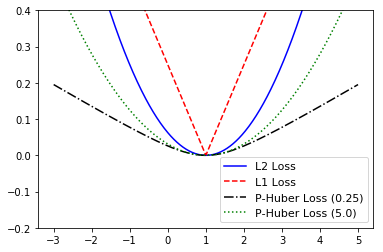

In [30]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

In [32]:
# Implementing back propagation
import numpy as np
import tensorflow as tf
sess = tf.Session()
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))
my_output = tf.multiply(x_data, A)
loss = tf.square(my_output - y_target)
init = tf.initialize_all_variables()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_opt.minimize(loss)

for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1) % 25 == 0:
        print('step #' + str(i+1) + ' A = ' +str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data:rand_x, y_target: rand_y })))

from tensorflow.python.framework import ops 
# import tensorflow as tf
# import numpy as np
ops.reset_default_graph()
sess = tf.Session()
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(3, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))
my_output = tf.add(x_data, A)

my_output_expanded = tf.expand_dims(my_output, 0)
print(my_output)
print(my_output_expanded)

y_target_expanded = tf.expand_dims(y_target, 0)
print(y_target)
print((y_target_expanded))

init = tf.global_variables_initializer()
sess.run(init)
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output_expanded, labels=y_target_expanded)
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

for i in range(1400):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1) % 200 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

step #25 A = [6.6228237]
Loss = [11.211924]
step #50 A = [8.75481]
Loss = [8.602157]
step #75 A = [9.588464]
Loss = [0.02139653]
step #100 A = [9.92997]
Loss = [0.12632006]
Tensor("Add:0", shape=(1,), dtype=float32)
Tensor("ExpandDims:0", shape=(1, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(1,), dtype=float32)
Tensor("ExpandDims_1:0", shape=(1, 1), dtype=float32)
Step #200 A = [6.091903]
Loss = [[2.2861505]]
Step #400 A = [1.3407096]
Loss = [[0.7100198]]
Step #600 A = [-0.37046045]
Loss = [[0.47203818]]
Step #800 A = [-0.80356467]
Loss = [[0.88262147]]
Step #1000 A = [-0.9361812]
Loss = [[0.10690213]]
Step #1200 A = [-0.8106045]
Loss = [[0.69463944]]
Step #1400 A = [-0.948924]
Loss = [[0.16462137]]


working with batches and stochastic trainings

In [51]:
%xmode plain
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
sess = tf.Session()

batch_size = 20
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
my_output = tf.matmul(x_data, A)
loss = tf.reduce_mean(tf.square(my_output - y_target))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_opt.minimize(loss)
loss_batch = []
# from ipdb import set_trace
# set_trace()
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    # print(rand_x)
    # print(rand_y)

    # set_trace()
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1) % 5 == 0:
        print('step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y })
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)



Exception reporting mode: Plain
step #5 A = [[0.6208272]]
Loss = 88.21398
step #10 A = [[2.3554823]]
Loss = 56.71319
step #15 A = [[3.7491126]]
Loss = 37.745804
step #20 A = [[4.895239]]
Loss = 27.924006
step #25 A = [[5.834037]]
Loss = 18.76893
step #30 A = [[6.6016703]]
Loss = 11.672731
step #35 A = [[7.225195]]
Loss = 8.30599
step #40 A = [[7.7299514]]
Loss = 5.6040754
step #45 A = [[8.151737]]
Loss = 4.6545205
step #50 A = [[8.496981]]
Loss = 3.3888047
step #55 A = [[8.776151]]
Loss = 2.4015567
step #60 A = [[9.0073595]]
Loss = 2.6711774
step #65 A = [[9.195778]]
Loss = 1.0009825
step #70 A = [[9.33707]]
Loss = 1.0243279
step #75 A = [[9.478961]]
Loss = 1.0072753
step #80 A = [[9.611313]]
Loss = 1.0716257
step #85 A = [[9.675171]]
Loss = 1.353658
step #90 A = [[9.74137]]
Loss = 0.9081281
step #95 A = [[9.800332]]
Loss = 0.6701369
step #100 A = [[9.875184]]
Loss = 1.1042894


In [52]:
loss_stochastic = []

for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_x = [rand_x] # add this to alter shape of the rand_x is (1, 1) instead of (1, ) because the placeholder x_data requires a tensor of shape (None, 1).without this alteration, the program will fail
    rand_y = [y_vals[rand_index]]
    rand_y = [rand_y]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1) % 5 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [[9.800425]]
Loss = 2.561915
Step #10 A = [[9.832416]]
Loss = 2.1919234
Step #15 A = [[9.948028]]
Loss = 1.9053401
Step #20 A = [[9.95393]]
Loss = 0.36839965
Step #25 A = [[10.063907]]
Loss = 2.3818357
Step #30 A = [[10.129699]]
Loss = 0.004287786
Step #35 A = [[10.050687]]
Loss = 1.050853
Step #40 A = [[10.0514145]]
Loss = 0.0053817546
Step #45 A = [[10.040129]]
Loss = 0.118513785
Step #50 A = [[10.084266]]
Loss = 0.45831615
Step #55 A = [[10.072497]]
Loss = 0.028666392
Step #60 A = [[10.025862]]
Loss = 0.37523127
Step #65 A = [[10.118359]]
Loss = 0.7388106
Step #70 A = [[10.05768]]
Loss = 1.2449094
Step #75 A = [[10.008967]]
Loss = 0.037422154
Step #80 A = [[9.998336]]
Loss = 0.49976912
Step #85 A = [[10.082371]]
Loss = 0.32368422
Step #90 A = [[10.005082]]
Loss = 0.14829348
Step #95 A = [[10.069787]]
Loss = 0.8533738
Step #100 A = [[10.12317]]
Loss = 2.2306042


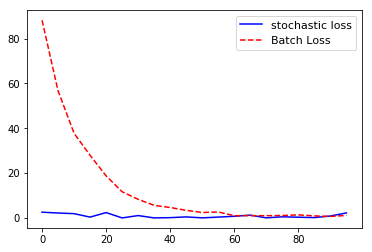

In [57]:
import matplotlib.pyplot as plt
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='stochastic loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
sess = tf.Session()
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

batch_size = 20
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)

my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)
init = tf.initialize_all_variables()
sess.run(init)

for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if (i+1) % 200 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

Step #200 A = [[8.701926]], b = [[-3.6077356]]
Step #400 A = [[10.224597]], b = [[-4.7509665]]


Step #600 A = [[11.159545]], b = [[-5.4874234]]
Step #800 A = [[11.887769]], b = [[-5.9090633]]


Step #1000 A = [[12.402253]], b = [[-6.455402]]


In [1]:
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
    ablineValues.append(slope*i+intercept)
    
setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i, a in enumerate(iris_2d) if 
            binary_target[i]==1]
non_setosa_x = [a[1] for i, a in enumerate(iris_2d) if 
                binary_target[i]==0]
non_setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i]==0]

plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()

NameError: name 'sess' is not defined

In [2]:
# Evaluateing models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
sess = tf.Session()
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
batch_size = 25
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(shape=[1, 1]))
my_output = tf.matmul(x_data, A)
loss = tf.reduce_mean(tf.square(my_output - y_target))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)
for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))
        


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Step #25 A = [[6.0447464]]
Loss = 16.689177
Step #50 A = [[8.54456]]
Loss = 1.8826284
Step #75 A = [[9.446085]]
Loss = 1.5643001
Step #100 A = [[9.759833]]
Loss = 1.171856


In [3]:
mse_test = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]),
                                     y_target: np.transpose([y_vals_test])})
mse_train = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), 
                                      y_target: np.transpose([y_vals_train])})
print("'MSE' on test:" + str(np.round(mse_test, 2)))
print("'MSE' on train:" + str(np.round(mse_train, 2)))

'MSE' on test:1.05
'MSE' on train:1.03


In [3]:
# using mutiple neural layers
# https://github.com/nfmcclure/tensorflow_cookbook/blob/master/06_Neural_Networks#/06_Using_Multiple_Layers/06_using_a_multiple_layer_network.ipynb

# Low Birth Weight (0 = Birth Weight >= 2500g,            LOW
#                          1 = Birth Weight < 2500g)
# Age of the Mother in Years                              AGE
# Weight in Pounds at the Last Menstrual Period           LWT
# Race (1 = White, 2 = Black, 3 = Other)                  RACE
# Smoking Status During Pregnancy (1 = Yes, 0 = No)       SMOKE
# History of Premature Labor (0 = None  1 = One, etc.)    PTL
# History of Hypertension (1 = Yes, 0 = No)               HT
# Presence of Uterine Irritability (1 = Yes, 0 = No)      UI
# Birth Weight in Grams                                   BWT


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import os
import os.path
import random
import numpy as np
import requests
from tensorflow.python.framework import ops


In [12]:
# Obtain the data
birth_weight_file  = 'birth_weight.csv'
if not os.path.exists(birth_weight_file):
    birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
    
    birth_file = requests.get(birthdata_url)
    birth_data = birth_file.text.split('\r\n')
    birth_header = birth_data[0].split('\t')
    birth_data = [[float(x) for x in y.split('\t') if len(x) >= 1] for y in birth_data[1:] if len(y) >= 1]
    with open(birth_weight_file, 'w') as f:
        writer = csv.writer(f)
        writer.writerows([birth_header])
        writer.writerows(birth_data)
        f.close()
        
birth_data = []
with open(birth_weight_file, newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    birth_header = next(csv_reader)
    for row in csv_reader:
        birth_data.append(row)
birth_data = [[float(x) for x in row] for row in birth_data]

y_vals = np.array([x[8] for x in birth_data])
cols_of_interest = ['AGE', 'LWT', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI']
x_vals = [[x[ix] for ix, feature in enumerate(birth_header) if feature in cols_of_interest] for x in birth_data]

# Train model
ops.reset_default_graph()
sess = tf.Session()
batch_size = 150
seed = 3
np.random.seed(seed)
tf.set_random_seed(seed)
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[test_indices]
y_vals_test = y_vals[test_indices]
train_max = np.max(x_vals_train, axis=0)
train_min = np.min(x_vals_train, axis=0)


def normalize_cols(mat, max_vals, min_vals):
    return (mat - min_vals) / (max_vals - min_vals)


x_vals_train = np.nan_to_num(normalize_cols(x_vals_train, train_max, train_min))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test, train_max, train_min))


def init_weight(shape, st_dev):
    weight = tf.Variable(tf.random_normal(shape, stddev=st_dev))
    return weight


def init_bias(shape, st_dev):
    bias = tf.Variable(tf.random_normal(shape, stddev=st_dev))
    return bias


x_data = tf.placeholder(shape=[None, 7], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1],dtype=tf.float32)


def fully_connnected(input_layer, weights, biases):
    layer = tf.add(tf.matmul(input_layer, weights), biases)
    return tf.nn.relu(layer)
# first layer (50 hidden nodes)


weight_1 = init_wight(shape = [7, 25], st_dev = 10.0)
bias_1 = init_bias(shape=[25], st_dev=10.0)
layer_1 = fully_connnected(x_data, weight_1, bias_1)

# second layer (25 hidden nodes)
weight_2 = init_weight(shape=[25, 10], st_dev=10.0)
bias_2 = init_bias(shape=[10], st_dev=10.0)
layer_2 = fully_connected(layer_1, weight_2, bias_2)


#--------Create third layer (5 hidden nodes)--------
weight_3 = init_weight(shape=[10, 3], st_dev=10.0)
bias_3 = init_bias(shape=[3], st_dev=10.0)
layer_3 = fully_connected(layer_2, weight_3, bias_3)


#--------Create output layer (1 output value)--------
weight_4 = init_weight(shape=[3, 1], st_dev=10.0)
bias_4 = init_bias(shape=[1], st_dev=10.0)
final_output = fully_connected(layer_3, weight_4, bias_4)

# Declare loss function (L1)
loss = tf.reduce_mean(tf.abs(y_target - final_output))

# Declare optimizer
my_opt = tf.train.AdamOptimizer(0.025)
train_step = my_opt.minimize(loss)

# Initialize Variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
test_loss = [] 
for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(test_temp_loss)
    if (i+1) % 25 == 0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))
        

IndexError: list index out of range

In [10]:
birth_data

[[],
 [1.0, 28.0, 113.0, 1.0, 1.0, 1.0, 0.0, 1.0, 709.0],
 [],
 [1.0, 29.0, 130.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1021.0],
 [],
 [1.0, 34.0, 187.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1135.0],
 [],
 [1.0, 25.0, 105.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1330.0],
 [],
 [1.0, 25.0, 85.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1474.0],
 [],
 [1.0, 27.0, 150.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1588.0],
 [],
 [1.0, 23.0, 97.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1588.0],
 [],
 [1.0, 24.0, 128.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1701.0],
 [],
 [1.0, 24.0, 132.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1729.0],
 [],
 [1.0, 21.0, 165.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1790.0],
 [],
 [1.0, 32.0, 105.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1818.0],
 [],
 [1.0, 19.0, 91.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1885.0],
 [],
 [1.0, 25.0, 115.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1893.0],
 [],
 [1.0, 16.0, 130.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1899.0],
 [],
 [1.0, 25.0, 92.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1928.0],
 [],
 [1.0, 20.0, 150.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1928.0],
 [],
 [1.0, 21.0, 190.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1928.0],
 [